# TP : Apprentissage Non Supervisé (Unsupervised Learning)
## Analyse des Datasets Iris et Wine

## Objectifs
- Comprendre les concepts fondamentaux de l'apprentissage non supervisé
- Analyser en profondeur les datasets Iris et Wine
- Implémenter et comparer différents algorithmes de clustering (K-Means, Hierarchical, DBSCAN, GMM)
- Utiliser des techniques de réduction de dimensionnalité (PCA, t-SNE)
- Visualiser et interpréter les résultats sur des données réelles
- Comprendre les applications pratiques de l'apprentissage non supervisé


## 1. Imports et Configuration

Importation des bibliothèques nécessaires pour l'apprentissage non supervisé.


In [16]:
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Metrics and Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, load_wine

# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Configuration
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Style pour les graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 2. Introduction à l'Apprentissage Non Supervisé

### 2.1. Concepts Fondamentaux

L'**apprentissage non supervisé** est une branche du machine learning où l'on cherche à trouver des patterns dans des données **sans labels** (sans supervision).

**Types principaux :**

1. **Clustering** : Regrouper des données similaires en clusters
   - K-Means
   - Clustering hiérarchique
   - DBSCAN
   - Gaussian Mixture Models (GMM)

2. **Réduction de dimensionnalité** : Réduire le nombre de features tout en conservant l'information
   - PCA (Principal Component Analysis)
   - t-SNE (t-distributed Stochastic Neighbor Embedding)
   - UMAP (optionnel)

3. **Association** : Trouver des règles d'association (ex: Market Basket Analysis)

### 2.2. Applications

- Segmentation de clients
- Détection d'anomalies
- Compression de données
- Visualisation de données
- Recommandation


## 3. Chargement et Exploration des Datasets

### 3.1. Dataset Iris

Le dataset **Iris** contient 150 échantillons de 3 espèces d'iris avec 4 caractéristiques (longueur/largeur sépale et pétale).


In [17]:
# Chargement du dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['target'] = y_iris
iris_df['target_name'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("="*70)
print("DATASET IRIS")
print("="*70)
print(f"Nombre d'échantillons: {X_iris.shape[0]}")
print(f"Nombre de features: {X_iris.shape[1]}")
print(f"Features: {list(iris.feature_names)}")
print(f"Nombre de classes: {len(np.unique(y_iris))}")
print(f"Classes: {iris.target_names}")
print(f"\nDistribution des classes:")
print(iris_df['target_name'].value_counts())
print(f"\nPremières lignes:")
print(iris_df.head())
print(f"\nStatistiques descriptives:")
print(iris_df.describe())


DATASET IRIS
Nombre d'échantillons: 150
Nombre de features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nombre de classes: 3
Classes: ['setosa' 'versicolor' 'virginica']

Distribution des classes:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Premières lignes:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Statistiques descriptive

### 3.2. Dataset Wine

Le dataset **Wine** contient 178 échantillons de 3 types de vins (cultivars) avec 13 caractéristiques chimiques.


In [18]:
# Chargement du dataset Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
wine_df = pd.DataFrame(X_wine, columns=wine.feature_names)
wine_df['target'] = y_wine

print("="*70)
print("DATASET WINE")
print("="*70)
print(f"Nombre d'échantillons: {X_wine.shape[0]}")
print(f"Nombre de features: {X_wine.shape[1]}")
print(f"Features: {list(wine.feature_names)}")
print(f"Nombre de classes: {len(np.unique(y_wine))}")
print(f"Classes: {wine.target_names}")
print(f"\nDistribution des classes:")
class_counts = pd.Series(y_wine).value_counts().sort_index()
for i, count in enumerate(class_counts):
    print(f"  Classe {i} ({wine.target_names[i]}): {count} échantillons")
print(f"\nPremières lignes:")
print(wine_df.head())
print(f"\nStatistiques descriptives:")
print(wine_df.describe())

DATASET WINE
Nombre d'échantillons: 178
Nombre de features: 13
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Nombre de classes: 3
Classes: ['class_0' 'class_1' 'class_2']

Distribution des classes:
  Classe 0 (class_0): 59 échantillons
  Classe 1 (class_1): 71 échantillons
  Classe 2 (class_2): 48 échantillons

Premières lignes:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phen

### 3.3. Exploration Visuelle des Datasets

Visualisons les distributions et relations entre les features.


#### 3.3.1. Visualisation du Dataset Iris


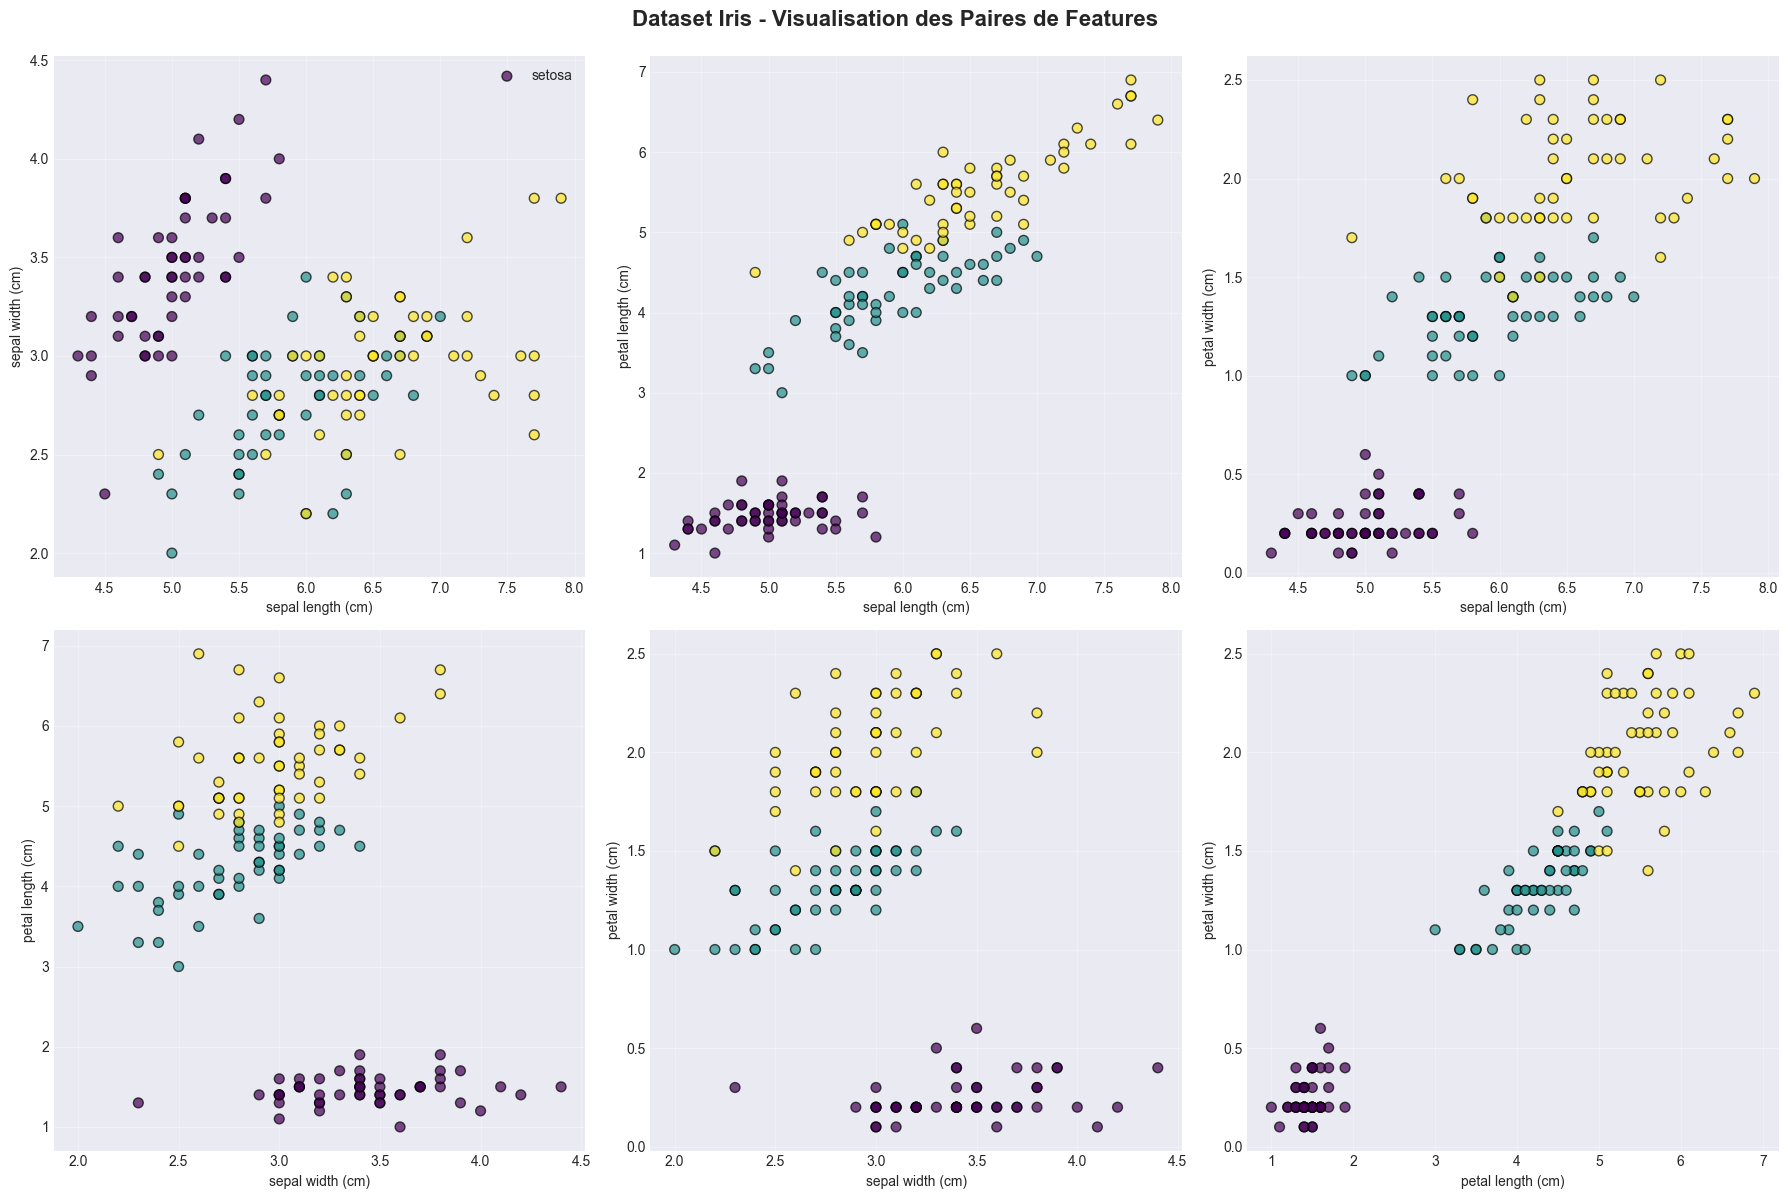

In [22]:
# Pairplot pour Iris
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Toutes les paires de features
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for idx, (i, j) in enumerate(pairs):
    row = idx // 3
    col = idx % 3
    scatter = axes[row, col].scatter(X_iris[:, i], X_iris[:, j], c=y_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    axes[row, col].set_xlabel(iris.feature_names[i])
    axes[row, col].set_ylabel(iris.feature_names[j])
    axes[row, col].grid(alpha=0.3)
    if idx == 0:
        axes[row, col].legend(['setosa', 'versicolor', 'virginica'], loc='upper right')

plt.suptitle('Dataset Iris - Visualisation des Paires de Features', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


#### 3.3.2. Visualisation du Dataset Wine


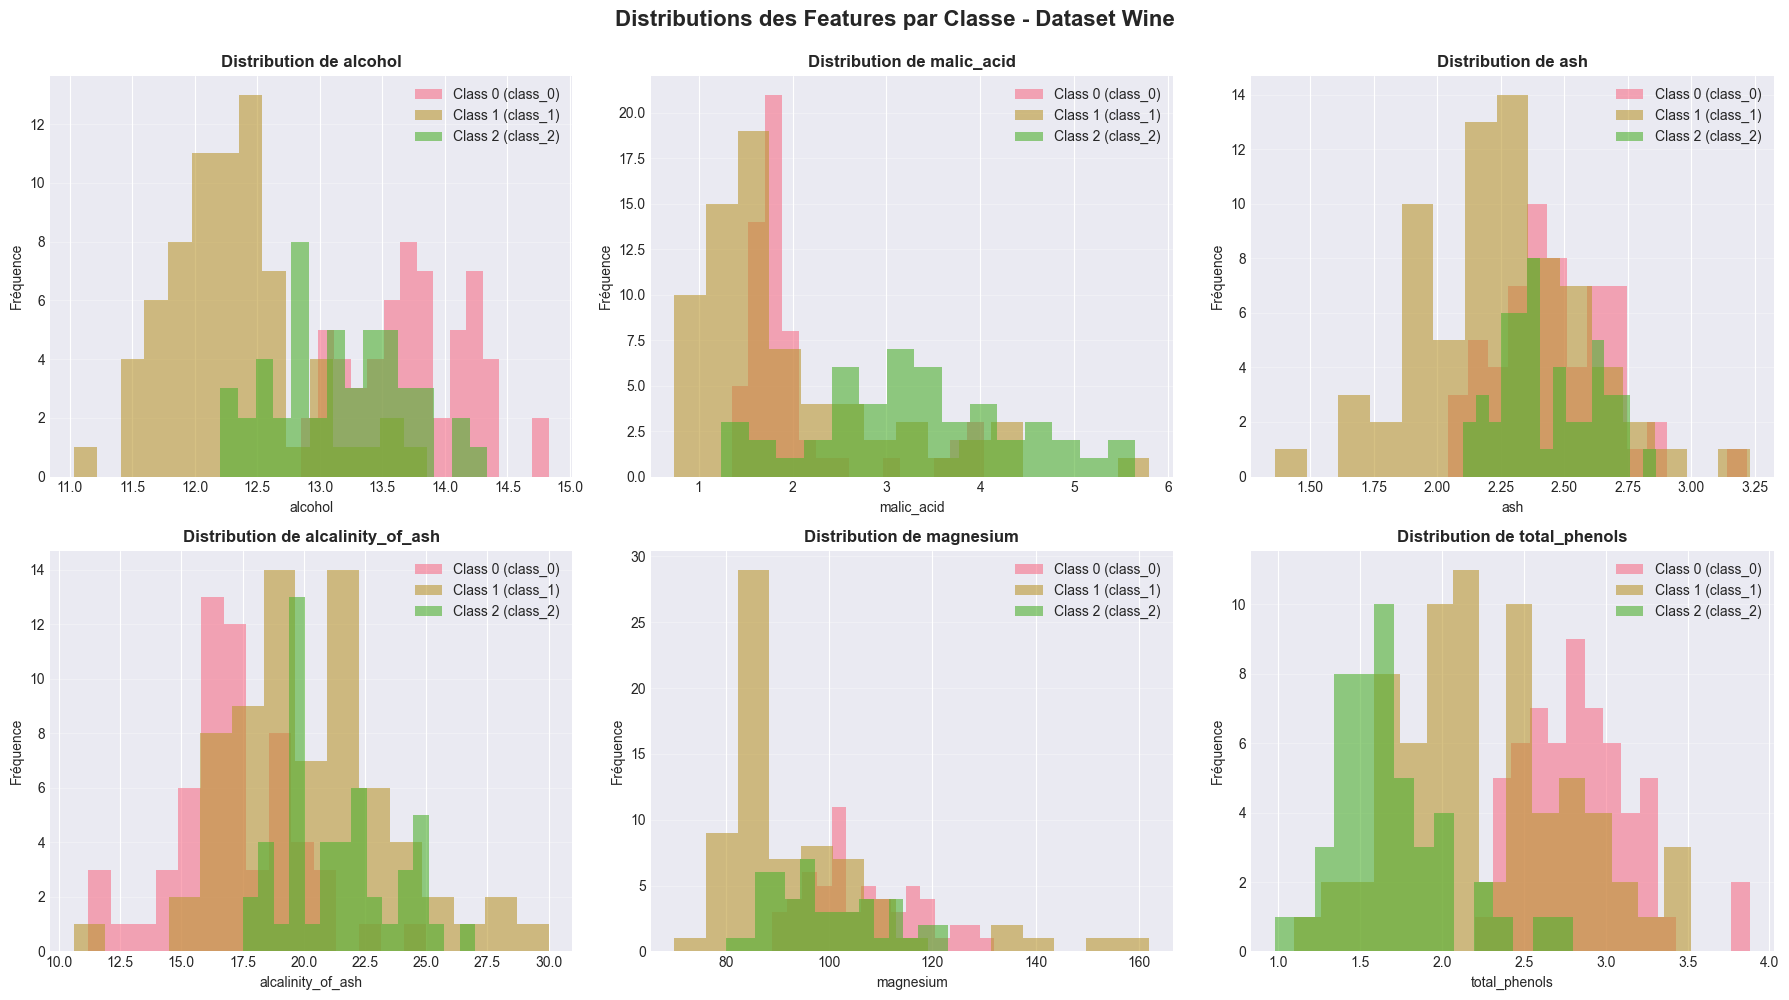

In [23]:
# Distribution de quelques features importantes
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
important_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols']

for idx, feature in enumerate(important_features):
    row = idx // 3
    col = idx % 3
    for class_id in range(3):
        data = wine_df[wine_df['target'] == class_id][feature]
        axes[row, col].hist(data, alpha=0.6, label=f'Class {class_id} ({wine.target_names[class_id]})', bins=15)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Fréquence')
    axes[row, col].set_title(f'Distribution de {feature}', fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(alpha=0.3, axis='y')

plt.suptitle('Distributions des Features par Classe - Dataset Wine', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 4. Clustering - K-Means

### 4.1. Principe du K-Means

**K-Means** est l'algorithme de clustering le plus populaire :
1. Choisir K centroïdes initiaux
2. Assigner chaque point au centroïde le plus proche
3. Recalculer les centroïdes (moyenne des points du cluster)
4. Répéter jusqu'à convergence

**Avantages :**
- Simple et rapide
- Fonctionne bien avec des groupes sphériques et bien séparés

**Inconvénients :**
- Nécessite de spécifier K (nombre de clusters)
- Sensible aux valeurs aberrantes
- Ne fonctionne pas bien avec des groupes non convexes


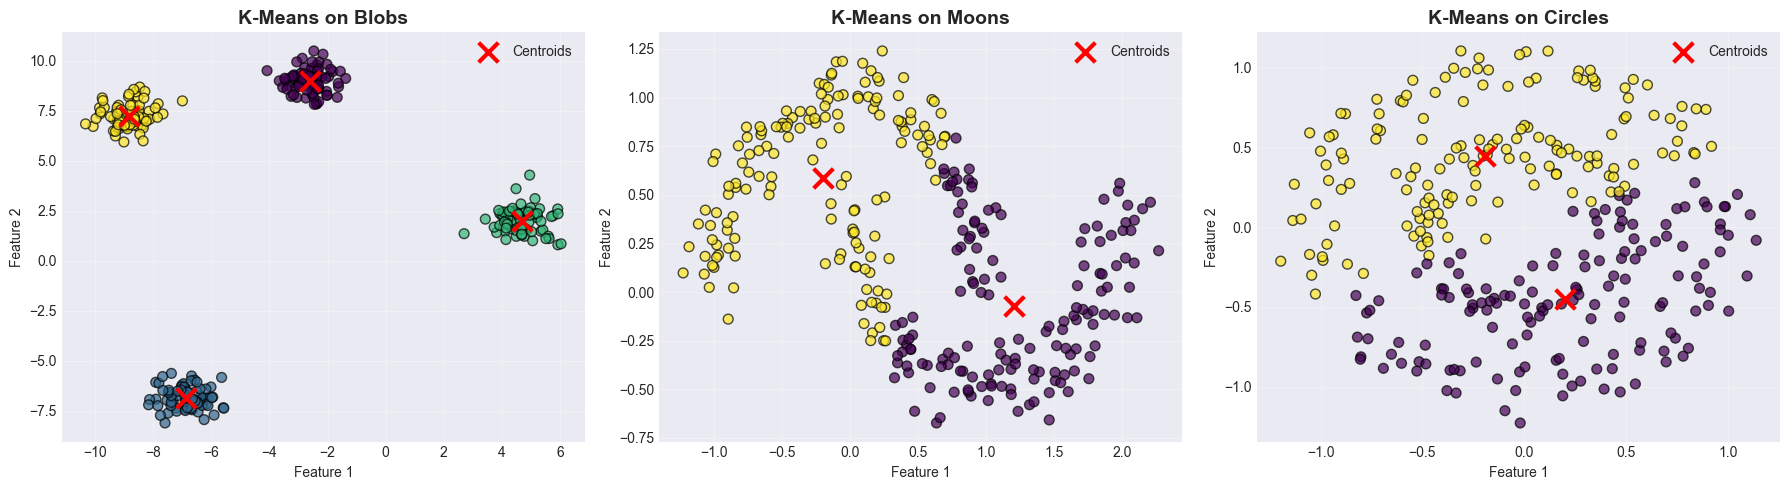

Inertia (Blobs): 203.89
Inertia (Moons): 125.19
Inertia (Circles): 119.69


In [25]:
# Application de K-Means sur différents datasets
def apply_kmeans(X, n_clusters, random_state=RANDOM_STATE):
    """Applique K-Means et retourne les labels et centroïdes"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    return labels, centroids, inertia

# Test sur Blobs
n_clusters = 4
labels_blobs, centroids_blobs, inertia_blobs = apply_kmeans(X_blobs, n_clusters)

# Test sur Moons (K-Means va avoir des difficultés)
labels_moons, centroids_moons, inertia_moons = apply_kmeans(X_moons, n_clusters=2)

# Test sur Circles (K-Means va échouer)
labels_circles, centroids_circles, inertia_circles = apply_kmeans(X_circles, n_clusters=2)

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

results = [
    (X_blobs, labels_blobs, centroids_blobs, 'K-Means on Blobs', True),
    (X_moons, labels_moons, centroids_moons, 'K-Means on Moons', True),
    (X_circles, labels_circles, centroids_circles, 'K-Means on Circles', True)
]

for idx, (X, labels, centroids, title, show_centroids) in enumerate(results):
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    if show_centroids:
        axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print(f"Inertia (Blobs): {inertia_blobs:.2f}")
print(f"Inertia (Moons): {inertia_moons:.2f}")
print(f"Inertia (Circles): {inertia_circles:.2f}")


### 4.2. Méthode du Coude (Elbow Method) pour Choisir K

Comment choisir le nombre optimal de clusters K ? On utilise la méthode du coude.


Méthode du coude pour le dataset Iris:


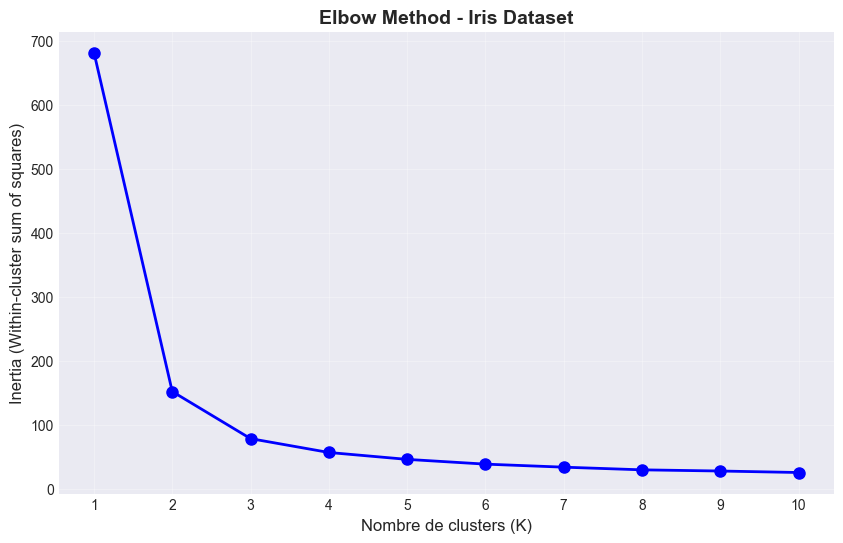


Méthode du coude pour le dataset Blobs:


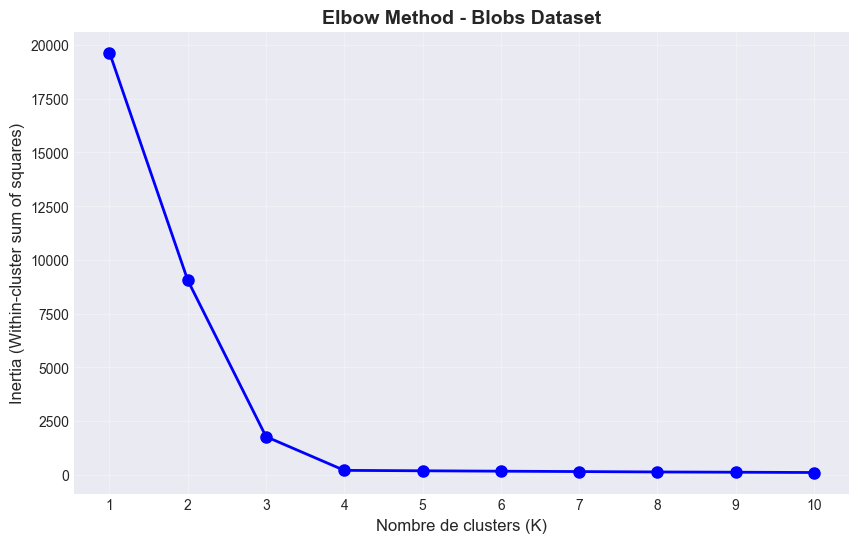

In [26]:
# Méthode du coude pour le dataset Iris
def plot_elbow_method(X, max_k=10, title="Elbow Method"):
    """Trace la courbe du coude pour déterminer le K optimal"""
    inertias = []
    k_range = range(1, max_k + 1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Nombre de clusters (K)', fontsize=12)
    plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(k_range)
    plt.show()
    
    return inertias

# Appliquer sur Iris
print("Méthode du coude pour le dataset Iris:")
inertias_iris = plot_elbow_method(X_iris, max_k=10, title="Elbow Method - Iris Dataset")

# Appliquer sur Blobs (on sait qu'il y a 4 clusters)
print("\nMéthode du coude pour le dataset Blobs:")
inertias_blobs = plot_elbow_method(X_blobs, max_k=10, title="Elbow Method - Blobs Dataset")


## 5. Clustering Hiérarchique

### 5.1. Principe du Clustering Hiérarchique

Le **clustering hiérarchique** crée une hiérarchie de clusters sans avoir besoin de spécifier K à l'avance.

**Types :**
- **Agglomerative (ascendant)** : Commence avec chaque point comme cluster, puis fusionne
- **Divisive (descendant)** : Commence avec un seul cluster, puis divise

**Avantages :**
- Visualisable avec un dendrogramme
- Pas besoin de spécifier K à l'avance
- Fonctionne avec différents types de distances

**Inconvénients :**
- Plus lent que K-Means
- Sensible au choix de la distance et du linkage


Dendrogramme pour le dataset Iris (échantillon de 50 points):


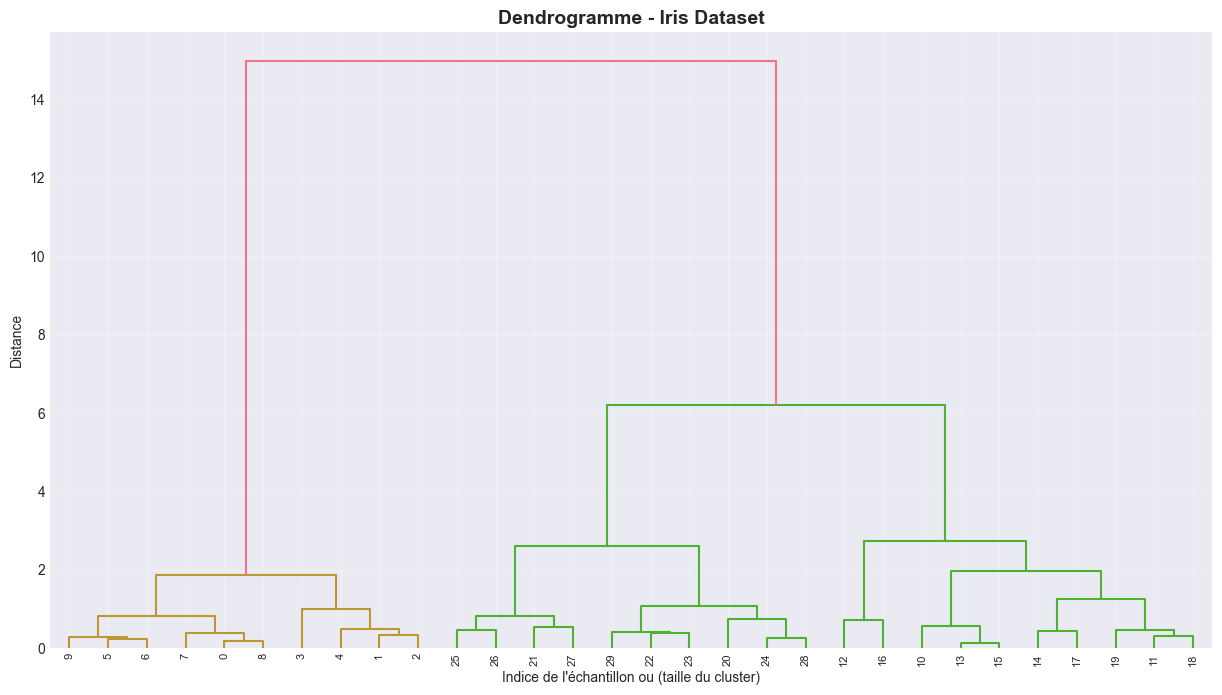

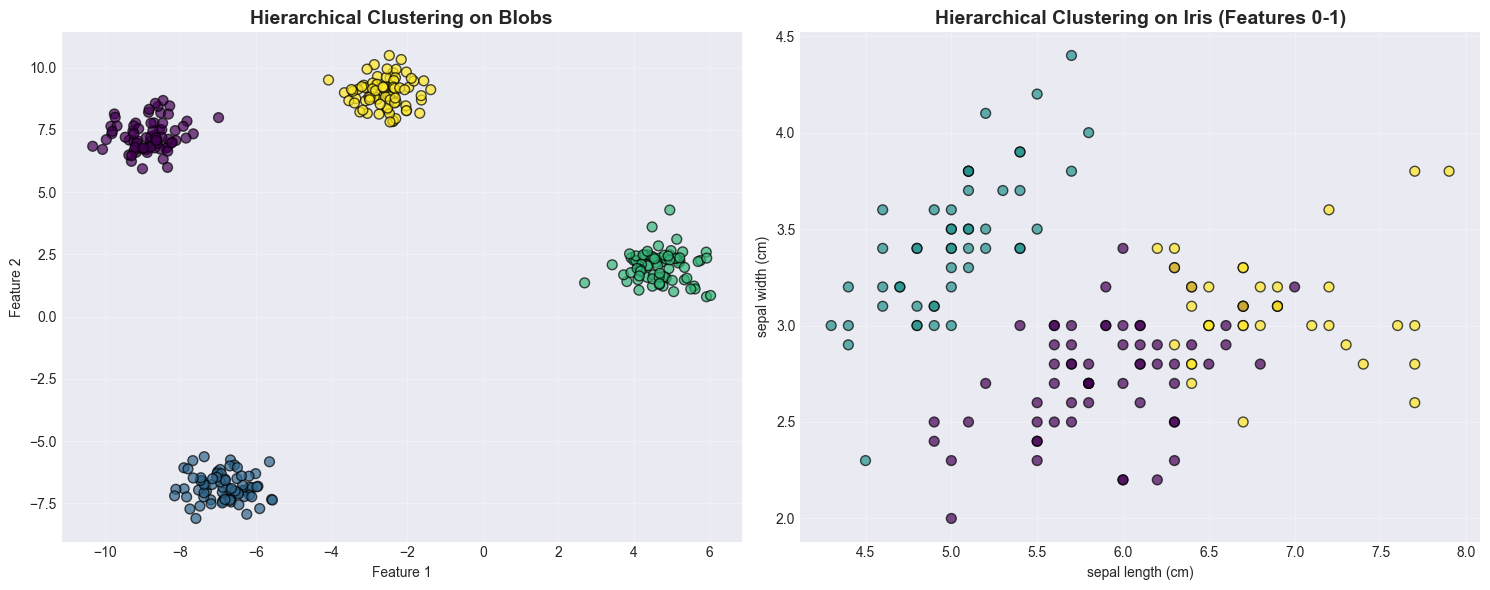

In [27]:
def plot_dendrogram(X, method='ward', title="Dendrogram"):
    """Trace le dendrogramme pour le clustering hiérarchique"""
    # Calculer la matrice de linkage
    linkage_matrix = linkage(X, method=method)
    
    # Tracer le dendrogramme
    plt.figure(figsize=(15, 8))
    dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Indice de l\'échantillon ou (taille du cluster)')
    plt.ylabel('Distance')
    plt.grid(alpha=0.3)
    plt.show()
    
    return linkage_matrix

# Clustering hiérarchique sur Iris (échantillon pour le dendrogramme)
print("Dendrogramme pour le dataset Iris (échantillon de 50 points):")
X_iris_sample = X_iris[::5]  # Prendre un échantillon
linkage_iris = plot_dendrogram(X_iris_sample, method='ward', title="Dendrogramme - Iris Dataset")

# Appliquer le clustering hiérarchique
def apply_hierarchical(X, n_clusters, linkage='ward'):
    """Applique le clustering hiérarchique"""
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = hierarchical.fit_predict(X)
    return labels

# Test sur différents datasets
n_clusters = 3
labels_hier_blobs = apply_hierarchical(X_blobs, n_clusters=4)
labels_hier_iris = apply_hierarchical(X_iris, n_clusters=3)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

scatter1 = axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_hier_blobs, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[0].set_title('Hierarchical Clustering on Blobs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(alpha=0.3)

scatter2 = axes[1].scatter(X_iris[:, 0], X_iris[:, 1], c=labels_hier_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
axes[1].set_title('Hierarchical Clustering on Iris (Features 0-1)', fontsize=14, fontweight='bold')
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 6. DBSCAN - Density-Based Clustering

### 6.1. Principe de DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) :
- Trouve des clusters basés sur la densité
- Peut trouver des clusters de formes arbitraires
- Identifie automatiquement les points aberrants (noise)

**Paramètres :**
- **eps** : Rayon de voisinage
- **min_samples** : Nombre minimum de points pour former un cluster

**Avantages :**
- Pas besoin de spécifier K
- Trouve des clusters non convexes
- Résistant aux outliers

**Inconvénients :**
- Sensible aux paramètres eps et min_samples
- Difficulté avec des clusters de densités différentes


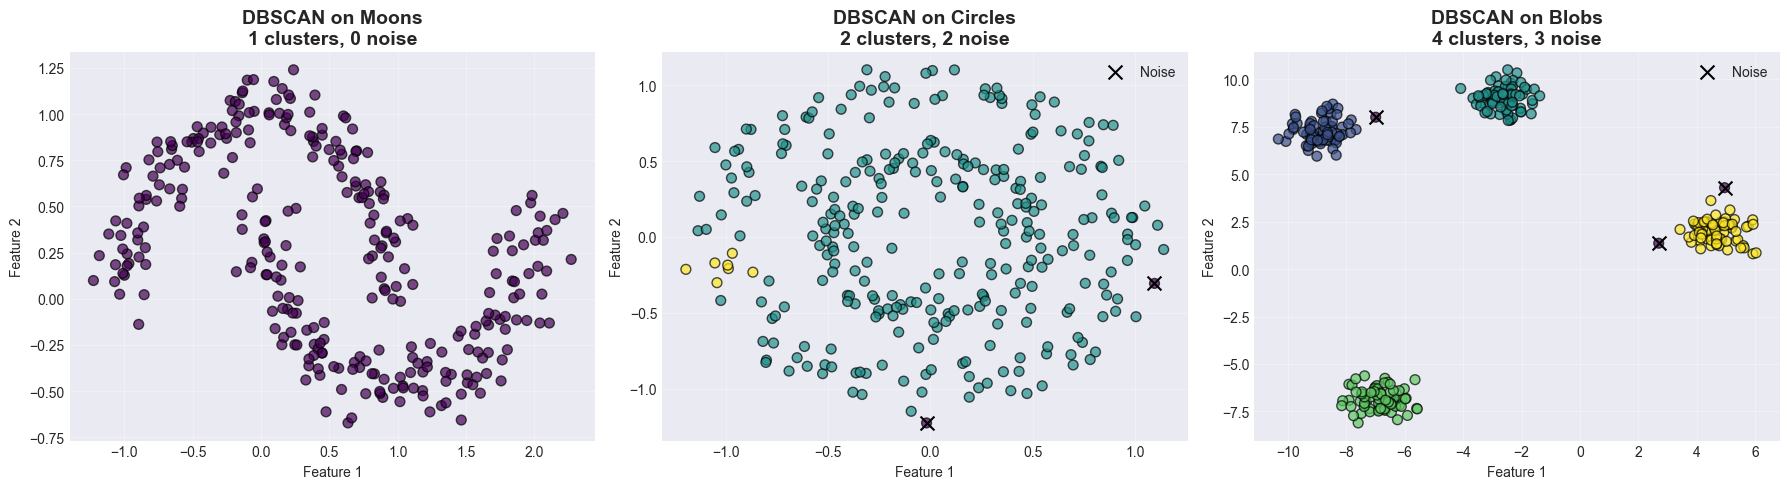

DBSCAN - Moons: 1 clusters, 0 points de bruit
DBSCAN - Circles: 2 clusters, 2 points de bruit
DBSCAN - Blobs: 4 clusters, 3 points de bruit


In [28]:
def apply_dbscan(X, eps=0.5, min_samples=5):
    """Applique DBSCAN et retourne les labels"""
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    return labels, n_clusters, n_noise

# Test sur différents datasets
labels_dbscan_moons, n_clust_moons, n_noise_moons = apply_dbscan(X_moons, eps=0.3, min_samples=5)
labels_dbscan_circles, n_clust_circles, n_noise_circles = apply_dbscan(X_circles, eps=0.2, min_samples=5)
labels_dbscan_blobs, n_clust_blobs, n_noise_blobs = apply_dbscan(X_blobs, eps=0.8, min_samples=5)

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

results = [
    (X_moons, labels_dbscan_moons, f'DBSCAN on Moons\n{n_clust_moons} clusters, {n_noise_moons} noise'),
    (X_circles, labels_dbscan_circles, f'DBSCAN on Circles\n{n_clust_circles} clusters, {n_noise_circles} noise'),
    (X_blobs, labels_dbscan_blobs, f'DBSCAN on Blobs\n{n_clust_blobs} clusters, {n_noise_blobs} noise')
]

for idx, (X, labels, title) in enumerate(results):
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    # Points de bruit en noir
    if -1 in labels:
        noise_mask = labels == -1
        axes[idx].scatter(X[noise_mask, 0], X[noise_mask, 1], c='black', marker='x', s=100, label='Noise')
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].grid(alpha=0.3)
    if -1 in labels:
        axes[idx].legend()

plt.tight_layout()
plt.show()

print(f"DBSCAN - Moons: {n_clust_moons} clusters, {n_noise_moons} points de bruit")
print(f"DBSCAN - Circles: {n_clust_circles} clusters, {n_noise_circles} points de bruit")
print(f"DBSCAN - Blobs: {n_clust_blobs} clusters, {n_noise_blobs} points de bruit")


## 7. Comparaison des Algorithmes de Clustering

Comparons les différents algorithmes sur le dataset Iris.


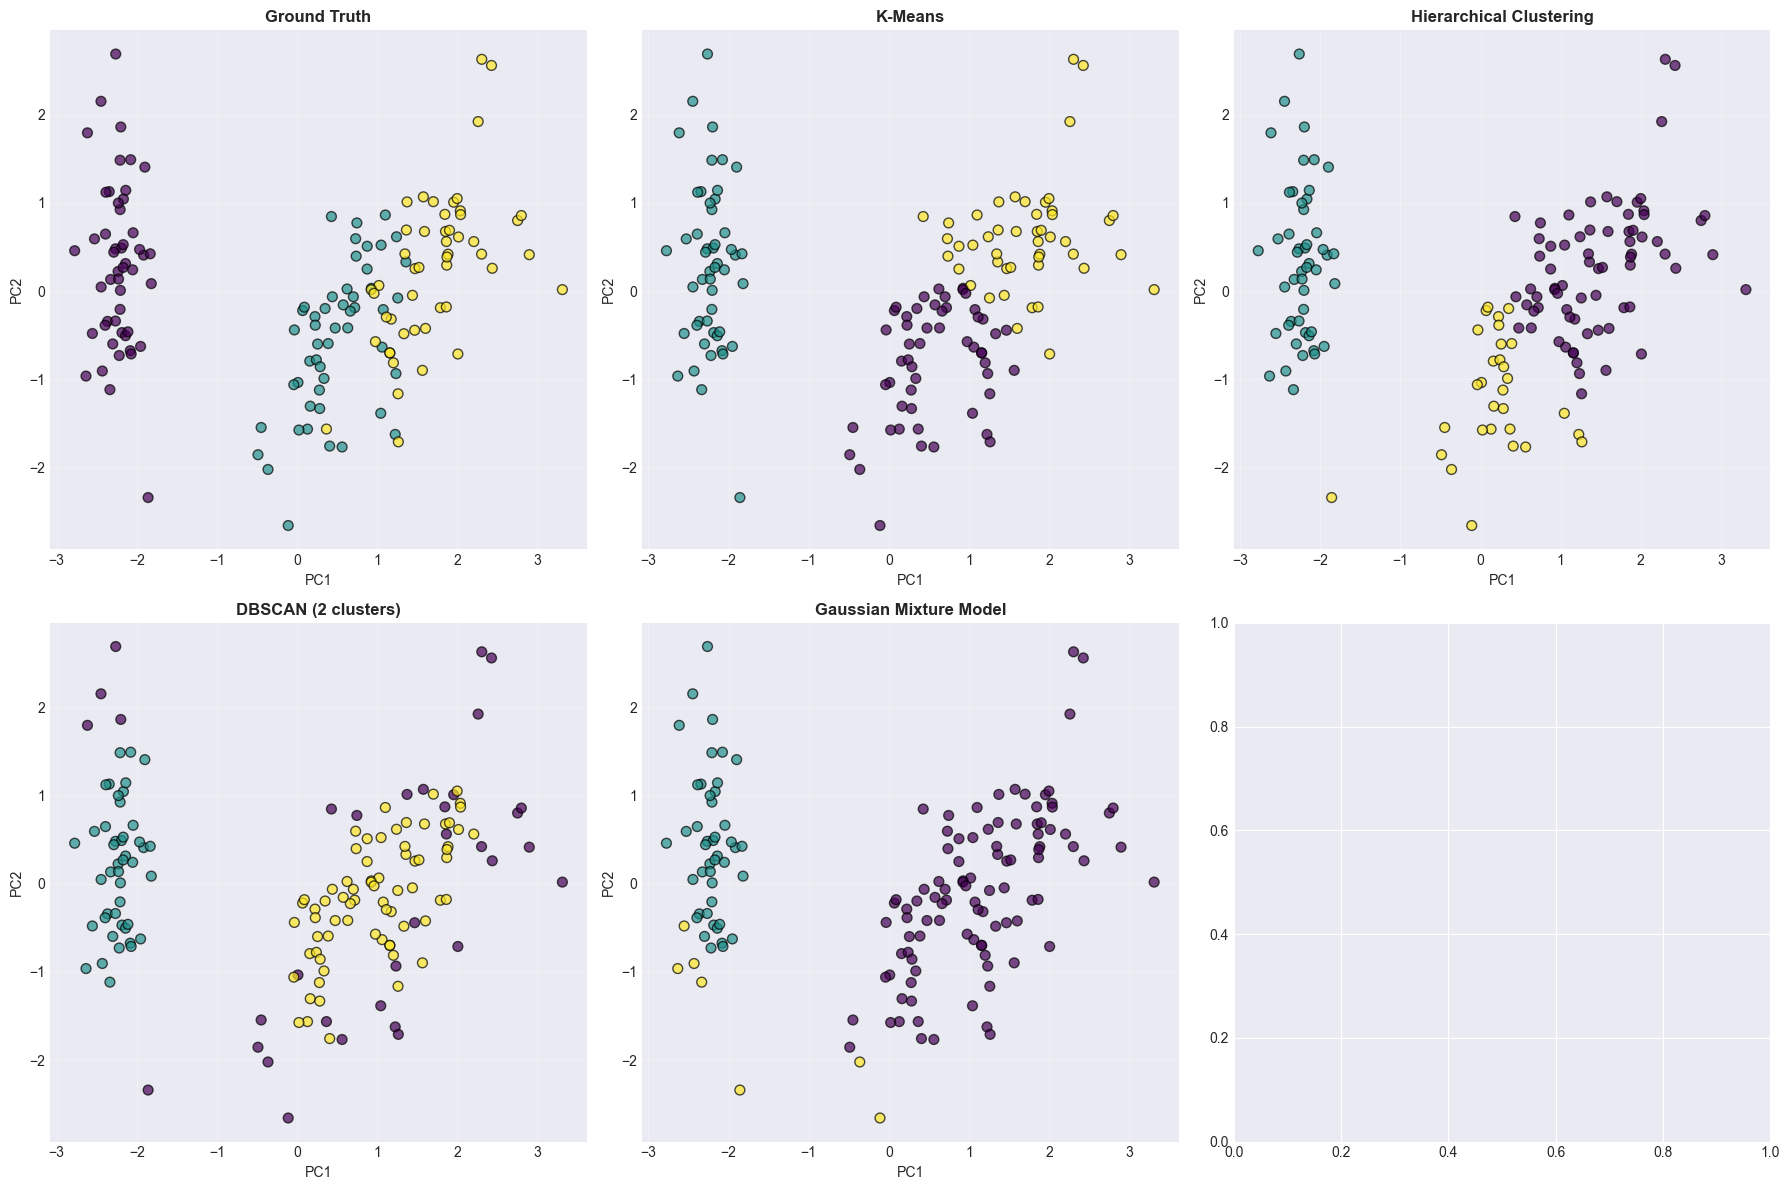


COMPARAISON DES ALGORITHMES DE CLUSTERING
              silhouette  davies_bouldin  calinski_harabasz  adjusted_rand  \
K-Means           0.4599          0.8336           241.9044         0.6201   
Hierarchical      0.4467          0.8035           222.7192         0.6153   
DBSCAN            0.3565          7.1241            84.5103         0.4421   
GMM               0.4751          0.8867           141.2315         0.5165   

                 nmi  
K-Means       0.6595  
Hierarchical  0.6755  
DBSCAN        0.5114  
GMM           0.6571  


In [29]:
# Normaliser les données Iris
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Appliquer différents algorithmes
n_clusters = 3

# K-Means
kmeans_iris = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=10)
labels_kmeans = kmeans_iris.fit_predict(X_iris_scaled)

# Hierarchical
labels_hier = apply_hierarchical(X_iris_scaled, n_clusters=n_clusters)

# DBSCAN
labels_dbscan, n_clust_dbscan, n_noise_dbscan = apply_dbscan(X_iris_scaled, eps=0.5, min_samples=5)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=RANDOM_STATE)
labels_gmm = gmm.fit_predict(X_iris_scaled)

# Visualisation (en 2D avec PCA pour la visualisation)
pca = PCA(n_components=2)
X_iris_2d = pca.fit_transform(X_iris_scaled)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

clustering_results = [
    (X_iris_2d, y_iris, 'Vraies classes', 'Ground Truth'),
    (X_iris_2d, labels_kmeans, 'K-Means', 'K-Means'),
    (X_iris_2d, labels_hier, 'Hierarchical', 'Hierarchical Clustering'),
    (X_iris_2d, labels_dbscan, 'DBSCAN', f'DBSCAN ({n_clust_dbscan} clusters)'),
    (X_iris_2d, labels_gmm, 'GMM', 'Gaussian Mixture Model')
]

for idx, (X_vis, labels, cmap_label, title) in enumerate(clustering_results):
    row = idx // 3
    col = idx % 3
    scatter = axes[row, col].scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculer les métriques de qualité
def evaluate_clustering(X, labels, y_true=None):
    """Évalue la qualité du clustering"""
    metrics = {}
    
    # Silhouette Score (plus proche de 1 = meilleur)
    if len(set(labels)) > 1:  # Besoin d'au moins 2 clusters
        metrics['silhouette'] = silhouette_score(X, labels)
    
    # Davies-Bouldin Score (plus proche de 0 = meilleur)
    if len(set(labels)) > 1:
        metrics['davies_bouldin'] = davies_bouldin_score(X, labels)
    
    # Calinski-Harabasz Score (plus élevé = meilleur)
    if len(set(labels)) > 1:
        metrics['calinski_harabasz'] = calinski_harabasz_score(X, labels)
    
    # Si on a les vraies classes
    if y_true is not None and len(set(labels)) == len(set(y_true)):
        metrics['adjusted_rand'] = adjusted_rand_score(y_true, labels)
        metrics['nmi'] = normalized_mutual_info_score(y_true, labels)
    
    return metrics

# Évaluer chaque algorithme
results_clustering = {}
for name, labels in [('K-Means', labels_kmeans), 
                     ('Hierarchical', labels_hier),
                     ('DBSCAN', labels_dbscan),
                     ('GMM', labels_gmm)]:
    results_clustering[name] = evaluate_clustering(X_iris_scaled, labels, y_iris)

# Afficher les résultats
print("\n" + "="*70)
print("COMPARAISON DES ALGORITHMES DE CLUSTERING")
print("="*70)
results_df = pd.DataFrame(results_clustering).T
print(results_df.round(4))


## 8. Réduction de Dimensionnalité - PCA

### 8.1. Principe de PCA

**PCA (Principal Component Analysis)** réduit la dimensionnalité en trouvant les axes de plus grande variance dans les données.

**Applications :**
- Visualisation de données multidimensionnelles
- Compression de données
- Réduction du bruit
- Accélération de l'entraînement

**Limitations :**
- Linéaire (ne capture pas les relations non-linéaires)
- Les composantes sont moins interprétables que les features originales


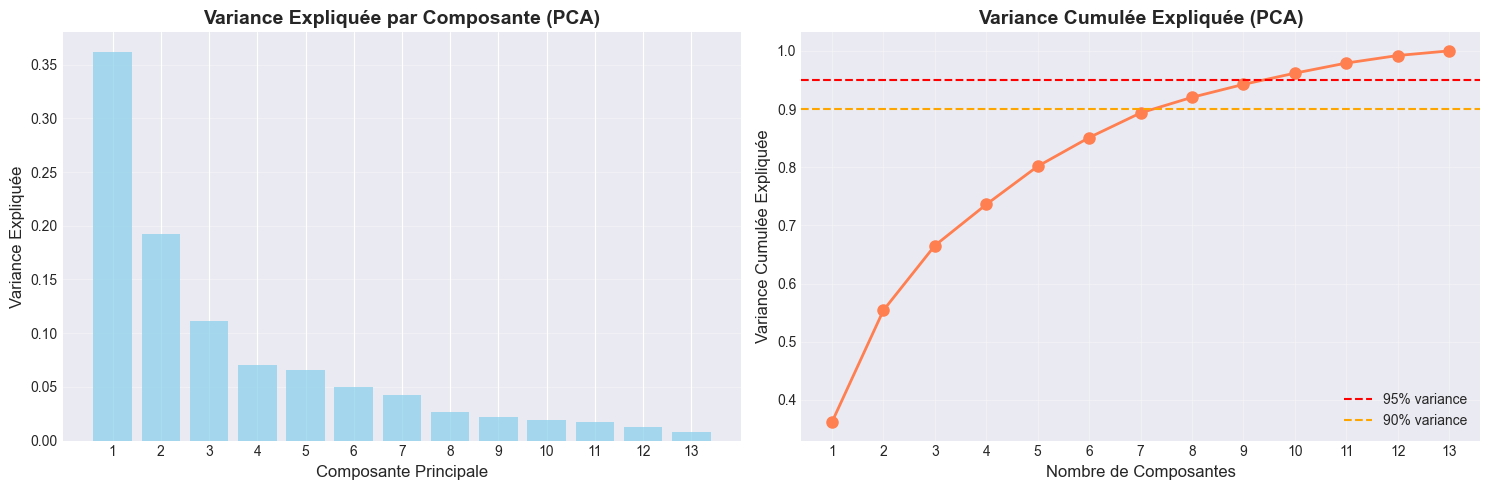


Variance expliquée par les 3 premières composantes: 66.53%
Nombre de composantes pour 95% de variance: 10


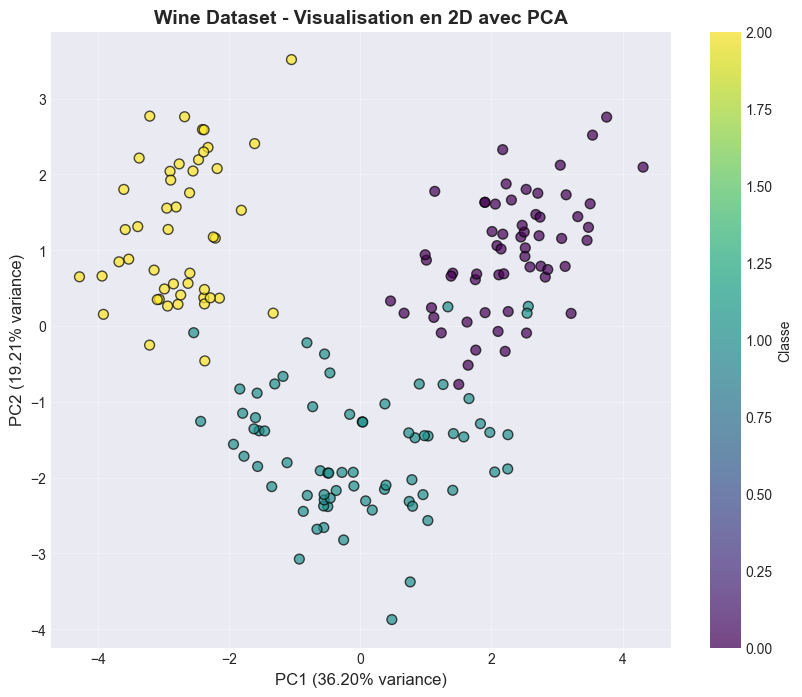

In [30]:
# Appliquer PCA sur le dataset Wine
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# PCA avec toutes les composantes pour voir la variance expliquée
pca_full = PCA()
X_wine_pca_full = pca_full.fit_transform(X_wine_scaled)

# Variance expliquée
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualisation de la variance expliquée
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
axes[0].set_xlabel('Composante Principale', fontsize=12)
axes[0].set_ylabel('Variance Expliquée', fontsize=12)
axes[0].set_title('Variance Expliquée par Composante (PCA)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
axes[0].set_xticks(range(1, len(explained_variance) + 1))

axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2, markersize=8, color='coral')
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% variance')
axes[1].set_xlabel('Nombre de Composantes', fontsize=12)
axes[1].set_ylabel('Variance Cumulée Expliquée', fontsize=12)
axes[1].set_title('Variance Cumulée Expliquée (PCA)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))

plt.tight_layout()
plt.show()

print(f"\nVariance expliquée par les 3 premières composantes: {cumulative_variance[2]:.2%}")
print(f"Nombre de composantes pour 95% de variance: {np.where(cumulative_variance >= 0.95)[0][0] + 1}")

# PCA avec 2 composantes pour la visualisation
pca_2d = PCA(n_components=2)
X_wine_2d = pca_2d.fit_transform(X_wine_scaled)

# Visualisation en 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_wine_2d[:, 0], X_wine_2d[:, 1], c=y_wine, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variance)', fontsize=12)
plt.title('Wine Dataset - Visualisation en 2D avec PCA', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Classe')
plt.grid(alpha=0.3)
plt.show()


### 8.2. Interprétation des Composantes Principales

Regardons quelles features originales contribuent le plus aux composantes principales.


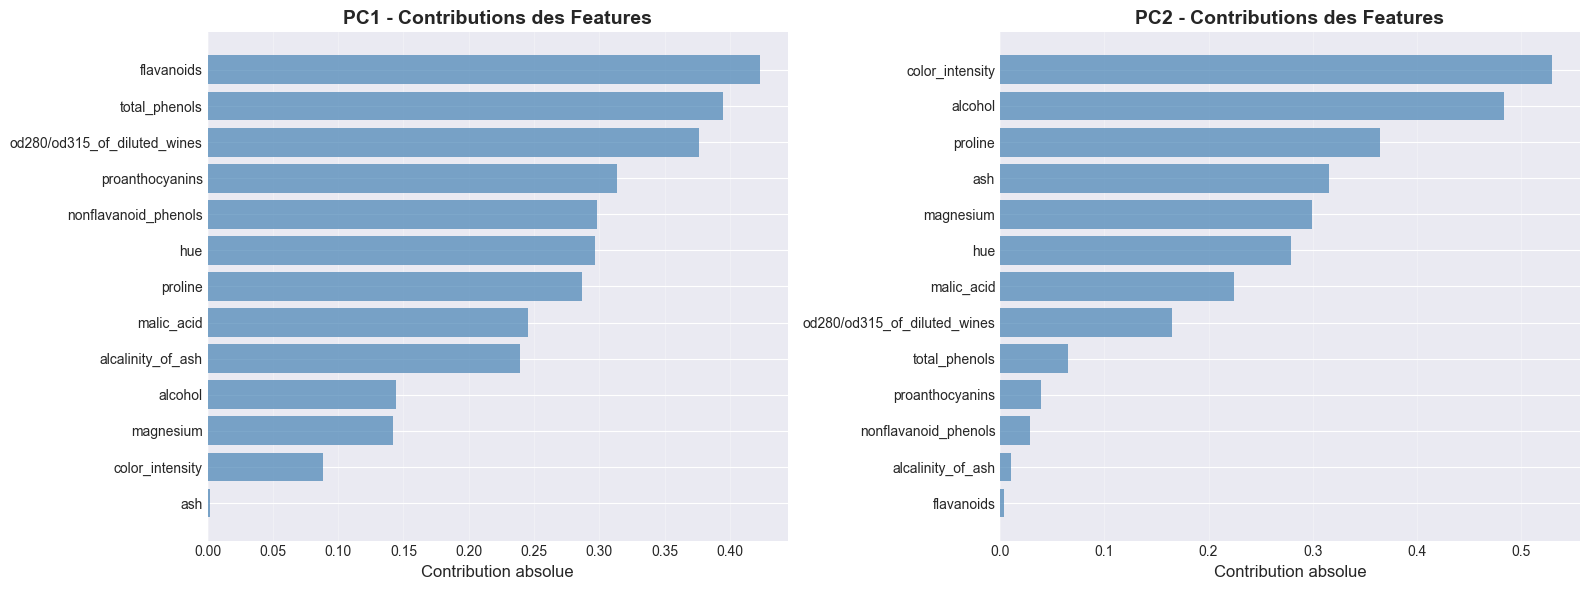

Top 5 features contribuant à PC1:
flavanoids                      0.422934
total_phenols                   0.394661
od280/od315_of_diluted_wines    0.376167
proanthocyanins                 0.313429
nonflavanoid_phenols            0.298533
Name: PC1, dtype: float64

Top 5 features contribuant à PC2:
color_intensity    0.529996
alcohol            0.483652
proline            0.364903
ash                0.316069
magnesium          0.299634
Name: PC2, dtype: float64


In [31]:
# Analyser les contributions des features aux composantes principales
components_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=wine.feature_names
)

# Visualiser les contributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, pc in enumerate(['PC1', 'PC2']):
    contrib = components_df[pc].abs().sort_values(ascending=True)
    axes[idx].barh(range(len(contrib)), contrib.values, alpha=0.7, color='steelblue')
    axes[idx].set_yticks(range(len(contrib)))
    axes[idx].set_yticklabels(contrib.index)
    axes[idx].set_xlabel('Contribution absolue', fontsize=12)
    axes[idx].set_title(f'{pc} - Contributions des Features', fontsize=14, fontweight='bold')
    axes[idx].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Top 5 features contribuant à PC1:")
print(components_df['PC1'].abs().nlargest(5))
print("\nTop 5 features contribuant à PC2:")
print(components_df['PC2'].abs().nlargest(5))


## 9. Application : Clustering avec PCA Préprocessing

Combinons PCA et clustering pour améliorer les performances.


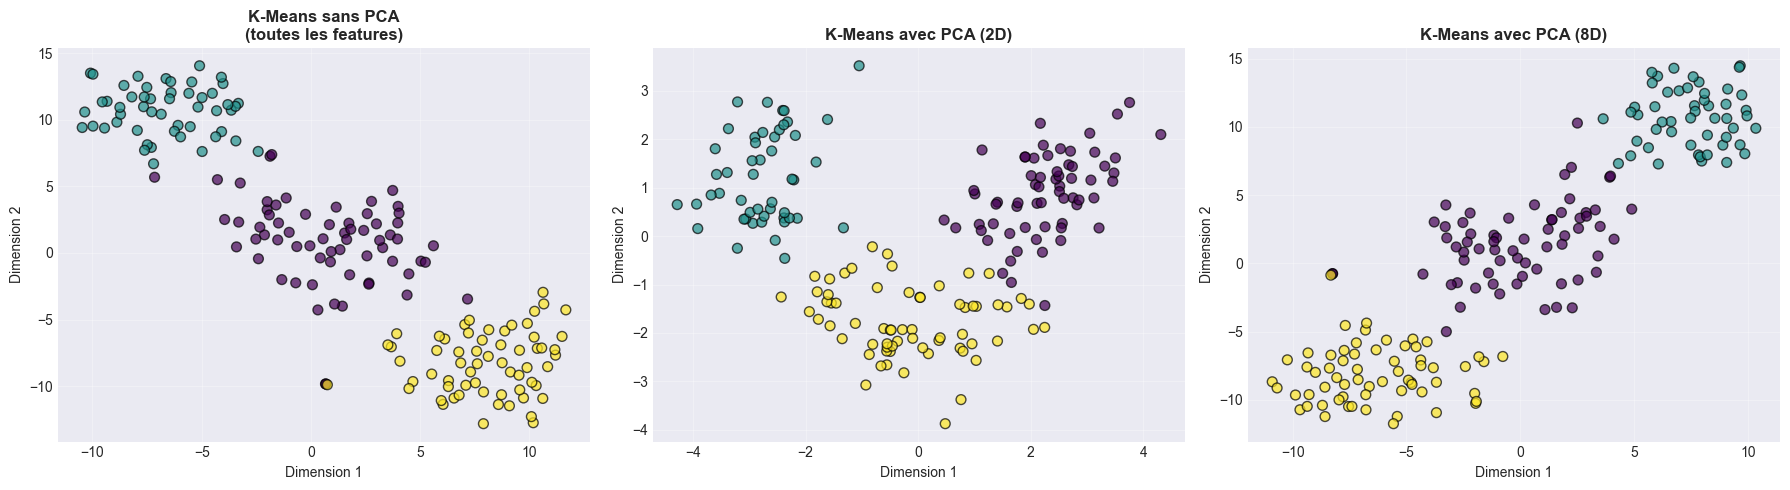


COMPARAISON DES MÉTRIQUES
          silhouette  davies_bouldin  calinski_harabasz  adjusted_rand     nmi
Sans PCA      0.2849          1.3892            70.9400         0.8975  0.8759
PCA 2D        0.5611          0.5973           344.7926         0.8951  0.8821
PCA 8D        0.3150          1.2669            82.7455         0.8975  0.8759


In [34]:
# Comparaison : Clustering avec et sans PCA
# Sans PCA
kmeans_no_pca = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_no_pca = kmeans_no_pca.fit_predict(X_wine_scaled)

# Avec PCA (2 composantes)
pca_wine = PCA(n_components=2)
X_wine_pca = pca_wine.fit_transform(X_wine_scaled)
kmeans_pca = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_wine_pca)

# Avec PCA (3 composantes pour 95% de variance)
pca_wine_95 = PCA(n_components=8)  # Pour ~95% de variance
X_wine_pca_95 = pca_wine_95.fit_transform(X_wine_scaled)
kmeans_pca_95 = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10)
labels_pca_95 = kmeans_pca_95.fit_predict(X_wine_pca_95)

# Visualisation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Visualisation en 2D avec t-SNE pour tous les cas
tsne_full = TSNE(n_components=2, random_state=RANDOM_STATE, perplexity=30)

visualizations = [
    (labels_no_pca, 'K-Means sans PCA\n(toutes les features)', X_wine_scaled),
    (labels_pca, 'K-Means avec PCA (2D)', X_wine_pca),
    (labels_pca_95, 'K-Means avec PCA (8D)', X_wine_pca_95)
]

for idx, (labels, title, X_data) in enumerate(visualizations):
    # Utiliser t-SNE pour visualisation si nécessaire
    if X_data.shape[1] > 2:
        X_vis = tsne_full.fit_transform(X_data)
    else:
        X_vis = X_data
    
    scatter = axes[idx].scatter(X_vis[:, 0], X_vis[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Dimension 1')
    axes[idx].set_ylabel('Dimension 2')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Comparer les métriques
print("\n" + "="*70)
print("COMPARAISON DES MÉTRIQUES")
print("="*70)

metrics_comparison = {}
for name, labels, X_data in [('Sans PCA', labels_no_pca, X_wine_scaled),
                              ('PCA 2D', labels_pca, X_wine_pca),
                              ('PCA 8D', labels_pca_95, X_wine_pca_95)]:
    metrics = evaluate_clustering(X_data, labels, y_wine)
    metrics_comparison[name] = metrics

metrics_df = pd.DataFrame(metrics_comparison).T
print(metrics_df.round(4))


## 10. Résumé et Comparaison des Algorithmes

### 10.1. Tableau Comparatif des Algorithmes de Clustering



COMPARAISON DES ALGORITHMES DE CLUSTERING
  Algorithme        K requis Formes de clusters  Outliers Vitesse Scalabilité
     K-Means             Oui         Sphériques  Sensible  Rapide       Bonne
Hierarchical Non (optionnel)        Toute forme  Sensible    Lent      Faible
      DBSCAN             Non  Basée sur densité Résistant   Moyen       Bonne
         GMM             Oui      Ellipsoïdales  Sensible   Moyen     Moyenne


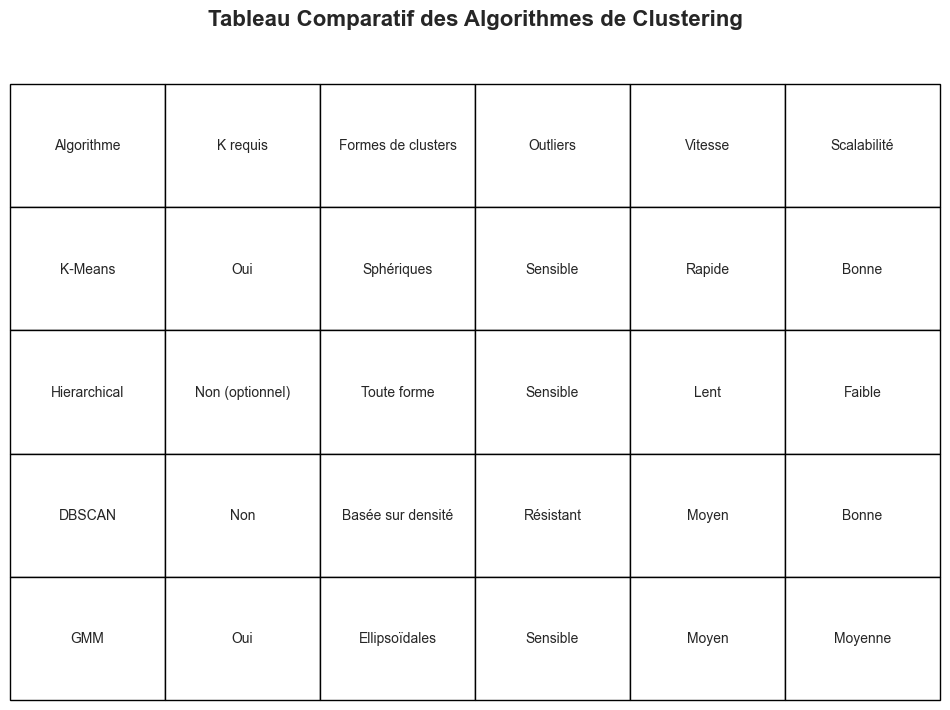

In [35]:
# Créer un tableau comparatif
comparison_data = {
    'Algorithme': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'K requis': ['Oui', 'Non (optionnel)', 'Non', 'Oui'],
    'Formes de clusters': ['Sphériques', 'Toute forme', 'Basée sur densité', 'Ellipsoïdales'],
    'Outliers': ['Sensible', 'Sensible', 'Résistant', 'Sensible'],
    'Vitesse': ['Rapide', 'Lent', 'Moyen', 'Moyen'],
    'Scalabilité': ['Bonne', 'Faible', 'Bonne', 'Moyenne']
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("COMPARAISON DES ALGORITHMES DE CLUSTERING")
print("="*80)
print(comparison_df.to_string(index=False))

# Visualisation
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=comparison_df.values,
                colLabels=comparison_df.columns,
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
plt.title('Tableau Comparatif des Algorithmes de Clustering', 
         fontsize=16, fontweight='bold', pad=20, y=1.05)
plt.show()


### 10.2. Métriques d'Évaluation du Clustering

**Métriques internes** (sans vraies classes) :
- **Silhouette Score** : Mesure à quel point les points sont bien assignés (entre -1 et 1, plus élevé = meilleur)
- **Davies-Bouldin Score** : Rapport entre distances intra-cluster et inter-cluster (plus proche de 0 = meilleur)
- **Calinski-Harabasz Score** : Ratio de variance entre clusters / variance intra-cluster (plus élevé = meilleur)

**Métriques externes** (avec vraies classes) :
- **Adjusted Rand Index** : Mesure l'accord entre deux clusterings (entre -1 et 1, plus élevé = meilleur)
- **Normalized Mutual Information** : Mesure l'information mutuelle normalisée (entre 0 et 1, plus élevé = meilleur)


## 11. Conclusions et Applications Pratiques

### 11.1. Quand Utiliser Quel Algorithme ?

**K-Means :**
- Dataset avec groupes sphériques et bien séparés
- Nombre de clusters connu ou estimable
- Besoin de vitesse

**Clustering Hiérarchique :**
- Structure hiérarchique attendue
- Visualisation avec dendrogramme souhaitée
- Nombre de clusters inconnu

**DBSCAN :**
- Clusters de formes arbitraires
- Présence d'outliers
- Densités variables (avec paramétrage adapté)

**GMM :**
- Clusters avec distributions gaussiennes
- Probabilités d'appartenance nécessaires
- Modèle probabiliste requis

### 12.2. Applications Réelles

1. **E-commerce** : Segmentation de clients pour marketing ciblé
2. **Bioinformatique** : Classification de gènes/protéines
3. **Image Processing** : Segmentation d'images
4. **Détection d'anomalies** : Identification de transactions frauduleuses
5. **Recherche documentaire** : Groupement de documents similaires
6. **Génétique** : Identification de groupes de gènes co-exprimés

### 12.3. Bonnes Pratiques

1. **Normaliser les données** : Important pour les algorithmes basés sur distance
2. **Choisir les bonnes métriques** : Selon le type de données
3. **Visualiser les résultats** : Essentiel pour interpréter les clusters
4. **Valider avec plusieurs métriques** : Pas une seule métrique n'est parfaite
5. **Comprendre le domaine** : L'expertise domain aide à valider les résultats
